In [43]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

# Perimeter_data
perimeter_data = data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]
diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding diagnosis
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

# Data normalization
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#perimeter_data = pd.DataFrame(x_scaled)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9385964912280702

[]

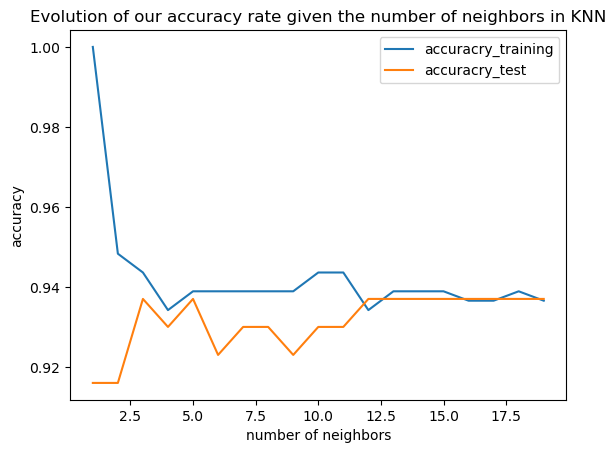

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

perimeter_data = f_data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]

diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding sex
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()

In [ ]:
#Explain why I choose my columns iteration 2

# Data normalization ? What is
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)m
#perimeter_data = pd.DataFrame(x_scaled)

/tmp/ipykernel_3902/4269895813.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['fractal_dimension_worst', 'fractal_dimension_se', 'fractal_dimension_mean', 'id'], axis=1).corr(), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.385479,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,1.0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.236828,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,1.0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.124896,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,1.0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.222524,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,1.0


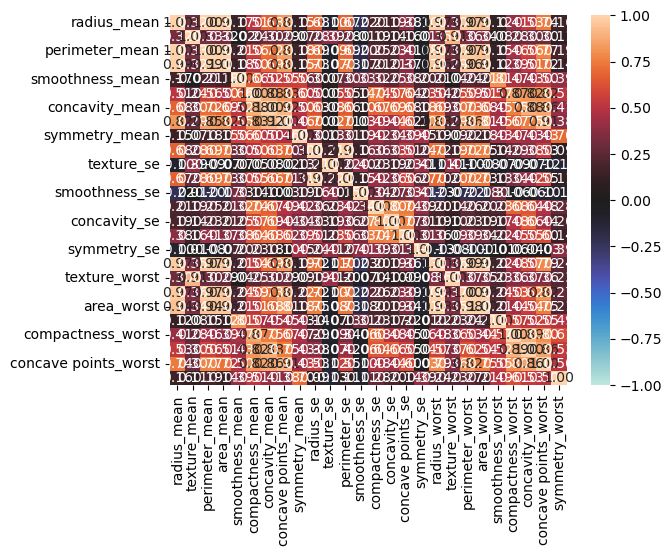

In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

cleanData = f_data.drop(['fractal_dimension_worst', 'fractal_dimension_se', 'fractal_dimension_mean', 'id', 'area_se', 'Unnamed: 32'], axis=1)
# sns.heatmap(cleanData.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")

diagnosis = pd.get_dummies(cleanData['diagnosis'], drop_first=True) #One hot encoding diagnosis
cleanData = pd.concat([cleanData, diagnosis], axis=1)
cleanData.drop(columns= ["diagnosis"], axis=1,inplace=True)

x = cleanData.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cleanData = pd.DataFrame(x_scaled)

y = cleanData[26]
X = cleanData.drop(columns=[26])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


for i in range(3):
    if i == 0:
        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(accuracy_score(y_test, y_pred))
        hyperparam = [i for i in range(1,20)]
        accuracy_training = []
        accuracy_test = []

        for k in hyperparam:
            #Training set
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_train)
            accuracy_training.append(accuracy_score(y_train, y_pred))
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy_test.append(accuracy_score(y_test, y_pred))

        plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
        plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
        plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
        plt.xlabel("number of neighbors")
        plt.ylabel("accuracy")
        plt.legend()
        plt.plot()
    if i == 1:
        print('SVN result')
        
    if i == 2:
        print('Decision tree result')
